In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as seabornInstance 
from matplotlib import style 
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
%matplotlib inline
from scipy.stats import loguniform

In [2]:
# Cargar el conjunto de datos
datos = pd.read_csv(filepath_or_buffer = "C:/Users/carlo/articulos_ml.csv", sep=',', low_memory=False)

In [3]:
# Mostrar una vista previa de los datos
print(datos.head())

                                               Title  \
0  What is Machine Learning and how do we use it ...   
1   10 Companies Using Machine Learning in Cool Ways   
2  How Artificial Intelligence Is Revolutionizing...   
3  Dbrain and the Blockchain of Artificial Intell...   
4  Nasa finds entire solar system filled with eig...   

                                                 url  Word count  # of Links  \
0  https://blog.signals.network/what-is-machine-l...        1888           1   
1                                                NaN        1742           9   
2                                                NaN         962           6   
3                                                NaN        1221           3   
4                                                NaN        2039           1   

   # of comments  # Images video  Elapsed days  # Shares  
0            2.0               2            34    200000  
1            NaN               9             5     25000  
2    

In [4]:
# Descripción general de los datos
print(datos.describe())

        Word count  # of Links  # of comments  # Images video  Elapsed days  \
count   161.000000  161.000000     129.000000      161.000000    161.000000   
mean   1808.260870    9.739130       8.782946        3.670807     98.124224   
std    1141.919385   47.271625      13.142822        3.418290    114.337535   
min     250.000000    0.000000       0.000000        1.000000      1.000000   
25%     990.000000    3.000000       2.000000        1.000000     31.000000   
50%    1674.000000    5.000000       6.000000        3.000000     62.000000   
75%    2369.000000    7.000000      12.000000        5.000000    124.000000   
max    8401.000000  600.000000     104.000000       22.000000   1002.000000   

            # Shares  
count     161.000000  
mean    27948.347826  
std     43408.006839  
min         0.000000  
25%      2800.000000  
50%     16458.000000  
75%     35691.000000  
max    350000.000000  


In [5]:
# Verificar la forma del dataframe
print(datos.shape)

(161, 8)


In [6]:
# Crear el DataFrame
df = pd.DataFrame(datos)

In [7]:
# Manejar valores faltantes si existen
df = df.fillna(0)

In [8]:
# Seleccionar las variables independientes y dependientes
X = df[['Word count', '# of Links', '# Images video']]
y = df['# Shares']

In [9]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
# Crear el modelo de regresión lineal
model = LinearRegression()

In [11]:
# Entrenar el modelo
model.fit(X_train, y_train)

LinearRegression()

In [12]:
# Para obtener el intercepto:
print("Intercepto:", model.intercept_)
# Para obtener la pendiente
print("Coeficientes:", model.coef_)

Intercepto: 17823.153960228752
Coeficientes: [3.14312366e-01 2.66334784e+02 2.38117462e+03]


In [13]:
# Predecir los resultados
y_pred = model.predict(X_test)

In [14]:
# Crear DataFrame para comparar valores reales y predicciones
datos2 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(datos2)

     Actual     Predicted
105    8001  33734.388210
108   53449  33157.917012
142   15512  29133.079109
55     2800  24434.961800
94      871  33738.249849
29     7100  72891.605308
101   13586  24866.086155
51      907  48322.713537
100   24206  22642.404349
143    9085  24488.282692
19    55000  21449.140079
84    45455  27192.682635
15    67300  23172.873731
66     1200  76947.492563
24     2400  26241.348996
30    14000  21022.393778
128   36707  25099.844664
148   35392  33604.464992
98    12269  33188.405311
16    60100  21918.318550
75    35691  26845.569573
18    37000  41364.377723
12    20000  50850.761924
9     35000  24147.770189
31     3000  22198.370867
152    1824  33728.528485
97    23832  31716.154480
56     3300  21651.355141
132   49421  33809.710967
104   32248  27796.386798
137   19828  22658.748592
78    30756  28200.065478
60     1800  23062.235778


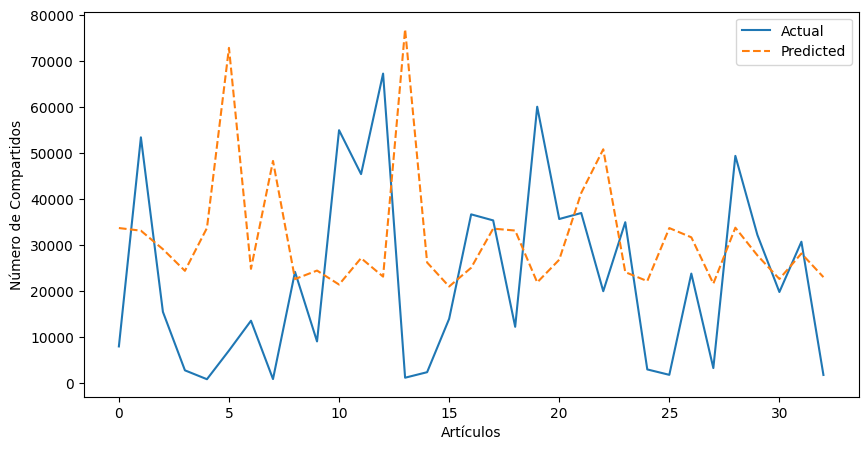

In [15]:
# Visualización de los resultados
plt.figure(figsize=(10,5))
plt.plot(datos2['Actual'].values, label='Actual')
plt.plot(datos2['Predicted'].values, label='Predicted', linestyle='--')
plt.xlabel('Artículos')
plt.ylabel('Número de Compartidos')
plt.legend()
plt.show()

In [16]:
# Evaluación del modelo
print('Error Absoluto Medio:', metrics.mean_absolute_error(y_test, y_pred)) 
print('Error Cuadrático Medio:', metrics.mean_squared_error(y_test, y_pred))
print('Raíz del error cuadrático medio:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
r2 = model.score(X_test, y_test)
print('Coeficiente de determinación R2 = ' + str(r2))

Error Absoluto Medio: 21503.405796405314
Error Cuadrático Medio: 764517890.8674803
Raíz del error cuadrático medio: 27649.91665208921
Coeficiente de determinación R2 = -1.0206916853399295


In [17]:
# Definir la evaluación
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

In [18]:
# Definir el espacio de búsqueda
space = dict()
space['copy_X'] = [True, False]
space['fit_intercept'] = [True, False]
space['positive'] = [True, False]

In [19]:
# Definir la búsqueda
search = GridSearchCV(model, space, scoring='neg_mean_absolute_error', n_jobs=-1, cv=cv)

In [20]:
# Ejecutar la búsqueda
result = search.fit(X, y)

In [21]:
# Resumen de resultados
print('Mejor puntuación: %s' % result.best_score_)
print('Mejores Hiperparámetros: %s ' % result.best_params_)

Mejor puntuación: -24980.93133639932
Mejores Hiperparámetros: {'copy_X': True, 'fit_intercept': False, 'positive': True} 


In [22]:
# Optimizar el modelo con los mejores hiperparámetros
model2 = LinearRegression(fit_intercept=True, positive=False, copy_X=True)

In [23]:
# Re-entrenar el modelo
model2.fit(X_train, y_train)

LinearRegression()

In [24]:
# Predecir con el mejor modelo
y_pred_optimized = model2.predict(X_test)

In [25]:
# Crear DataFrame para comparar valores reales y predicciones optimizadas
datos2_optimized = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_optimized})
print(datos2_optimized)

     Actual     Predicted
105    8001  33734.388210
108   53449  33157.917012
142   15512  29133.079109
55     2800  24434.961800
94      871  33738.249849
29     7100  72891.605308
101   13586  24866.086155
51      907  48322.713537
100   24206  22642.404349
143    9085  24488.282692
19    55000  21449.140079
84    45455  27192.682635
15    67300  23172.873731
66     1200  76947.492563
24     2400  26241.348996
30    14000  21022.393778
128   36707  25099.844664
148   35392  33604.464992
98    12269  33188.405311
16    60100  21918.318550
75    35691  26845.569573
18    37000  41364.377723
12    20000  50850.761924
9     35000  24147.770189
31     3000  22198.370867
152    1824  33728.528485
97    23832  31716.154480
56     3300  21651.355141
132   49421  33809.710967
104   32248  27796.386798
137   19828  22658.748592
78    30756  28200.065478
60     1800  23062.235778


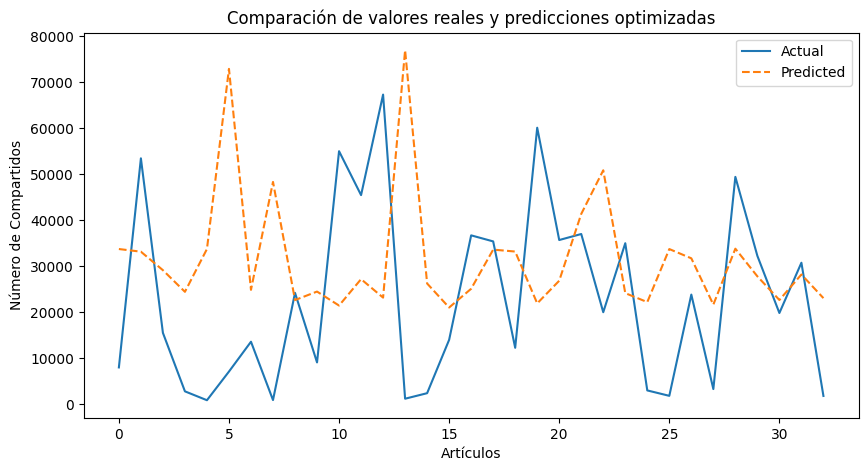

In [26]:
# Visualización de los resultados optimizados
plt.figure(figsize=(10,5))
plt.plot(datos2_optimized['Actual'].values, label='Actual')
plt.plot(datos2_optimized['Predicted'].values, label='Predicted', linestyle='--')
plt.legend()
plt.xlabel('Artículos')
plt.ylabel('Número de Compartidos')
plt.title('Comparación de valores reales y predicciones optimizadas')
plt.show()

In [27]:
# Guardar los datos obtenidos en un archivo CSV
datos2_optimized.to_csv('datosobtenidosregresion.csv')